#Lab 3
###Alex Monaghan
####Professor Davis
####7 May 2021

##1) Required Packages

In [1]:
install.packages('tswge')
library('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




In [2]:
install.packages('tuneR')
library('tuneR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##2) Introduction

This lab aims to observe how filters work and how they can be implemented.  For this lab, an audio file is being used.  This audio file is Friday by Rebecca Black, obtained from Soundboard.  Filters are constraints that can be placed upon data, so that only what is desired can be kept, and whatever is unwanted is eliminated.  In this lab, a simple filter will be utilized, only removing values that reach a certain threshold.  Essentially, filters can be utilized to reduce the amount of data that is being processed, if there is harmful data that is needed to be removed or simply to only observe what is required to reduce the size of a dataset.

There are actually numerous examples of filters in our day to day life since they are anything that takes in an input and removes undesirable outputs.  For example, if you are shopping online, oftentimes there is literally a filter function where you can narrow down what results are shown.  This is extremely helpful if you find yourself scrolling through hundreds of different clothes when you are only looking for a white t-shirt for example.

##3) Methods

Loading the data in (Friday by Rebecca Black)

In [3]:
friday <- readMP3("/content/friday.mp3")

Number of minutes in audio

In [7]:
samples <- length(friday@left)
print(samples / friday@samp.rate / 60)

[1] 3.785143


Amplitudes

In [8]:
left <- friday@left
amp <- left / 2^(friday@bit - 1)

Time (seconds)

In [9]:
time <- (0:(samples - 1)) / friday@samp.rate

Plotting 5,000 samples from when the music starts to play (the begining 10,000 are silent since there are over 10 million samples)

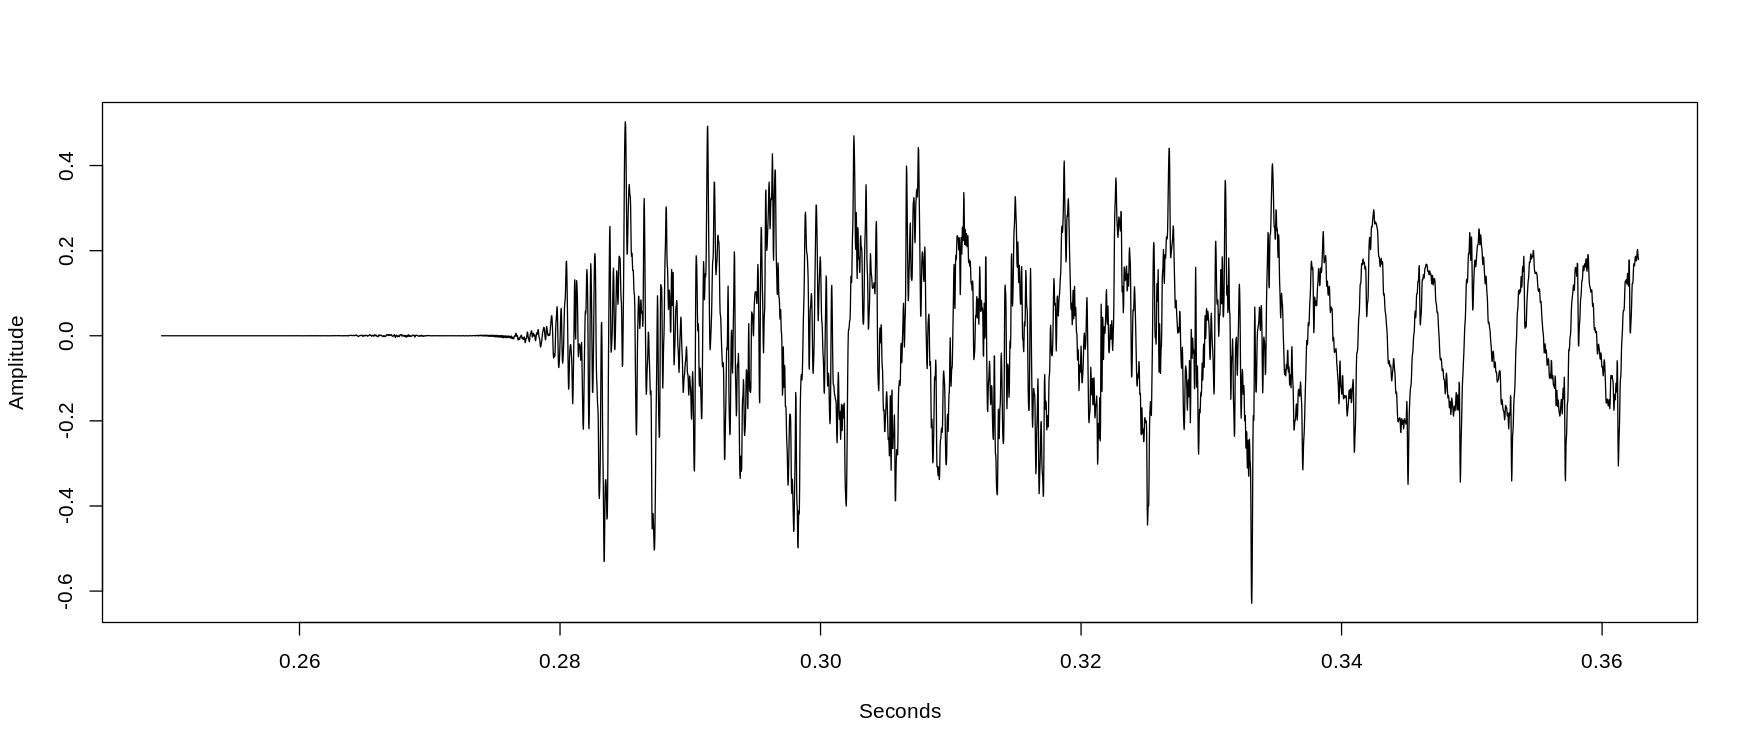

In [24]:
ampComp <- amp[11000:16000]
timeComp <- time[11000:16000]
plot(timeComp, ampComp, type='l', xlab='Seconds', ylab='Amplitude')

Summary Statistics

In [26]:
cat(paste("Bit Depth:",friday@bit,"\n"))
cat(paste("Sampling Rate:",friday@samp.rate,"Hz\n"))
cat(paste("Number of Samples:",samples,"\n"))

Bit Depth: 16 
Sampling Rate: 44100 Hz
Number of Samples: 10015488 


##4) Results

In [28]:
data <- amp[11000:16000]

Raw Data

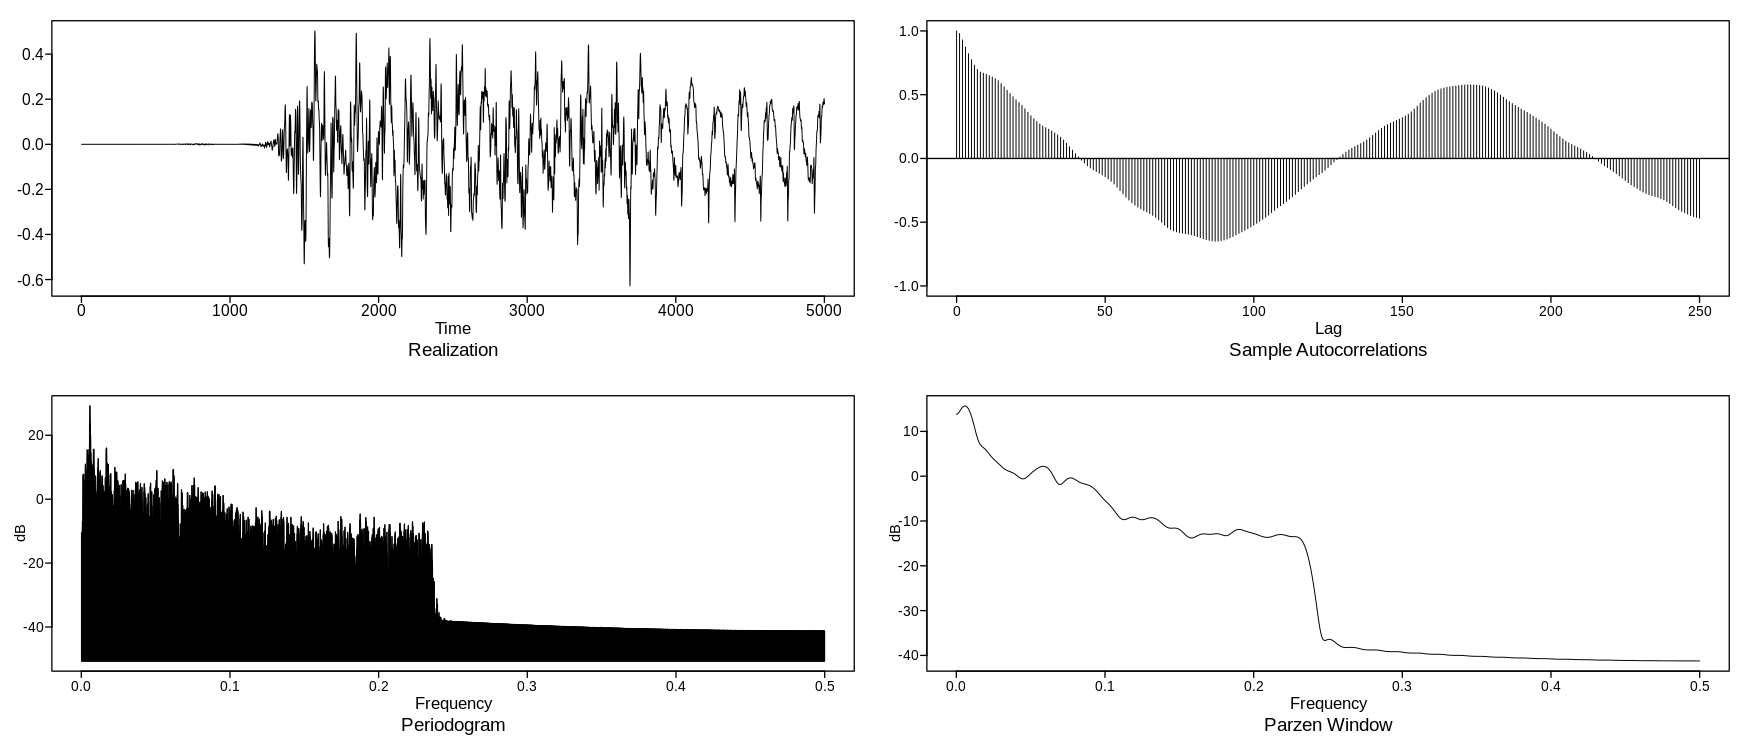

In [30]:
norm.plots <- plotts.sample.wge(data, lag.max = 250)

In [32]:
data.high <- butterworth.wge(data, 4, type = 'high', cutoff = 0.15, plot = FALSE)
data.low <- butterworth.wge(data, 4, type = 'low', cutoff = 0.05, plot = FALSE)
data.band <- butterworth.wge(data, 4, type = 'pass', cutoff = c(0.05,0.15), plot = FALSE)

High-Pass Filter

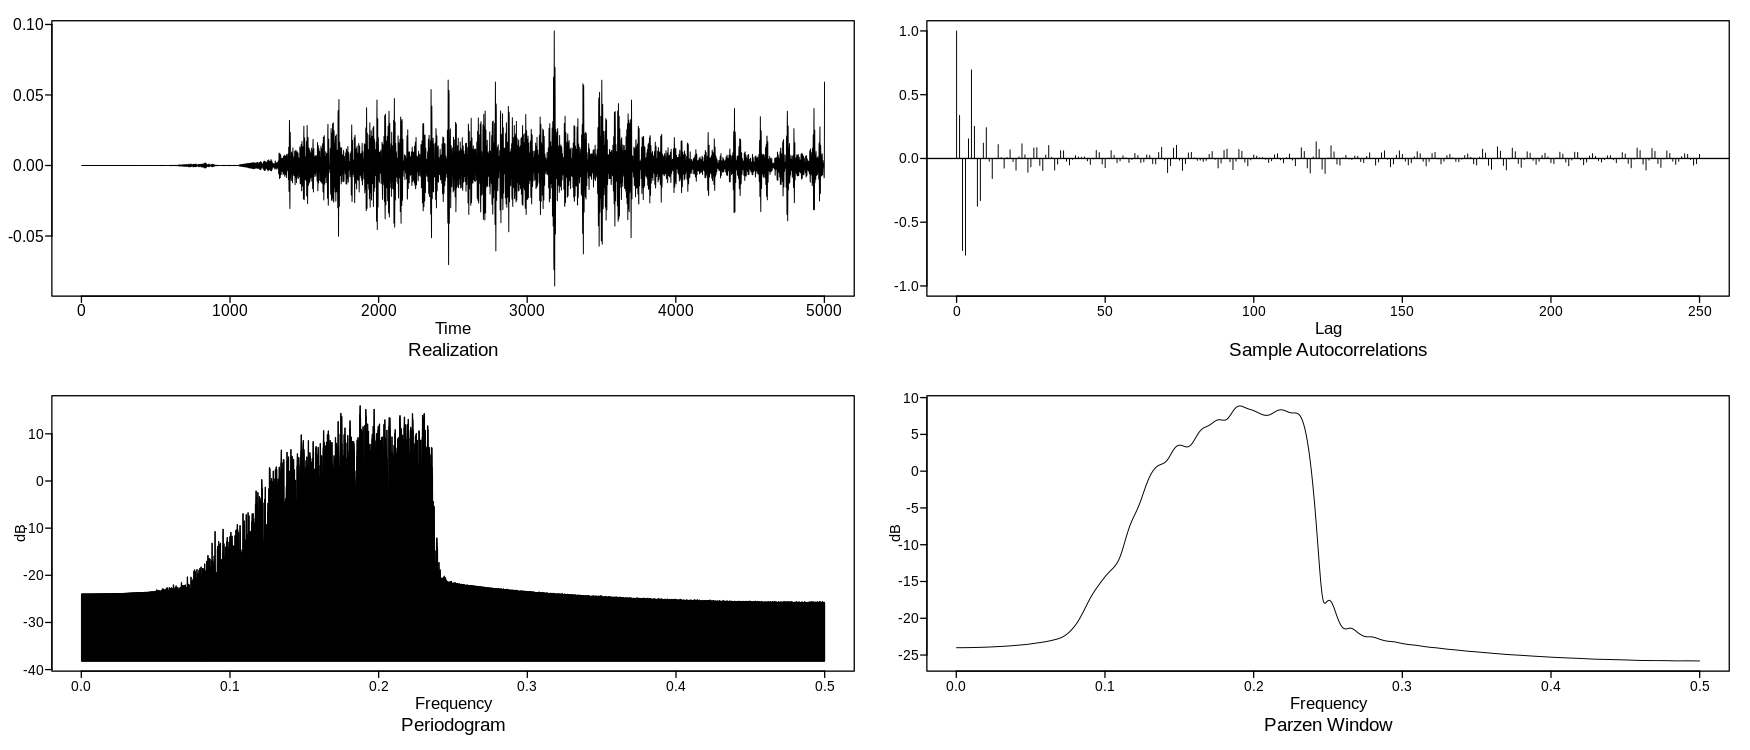

In [33]:
high.plots <- plotts.sample.wge(data.high$x.filt, lag.max = 250)

Low-Pass Filter

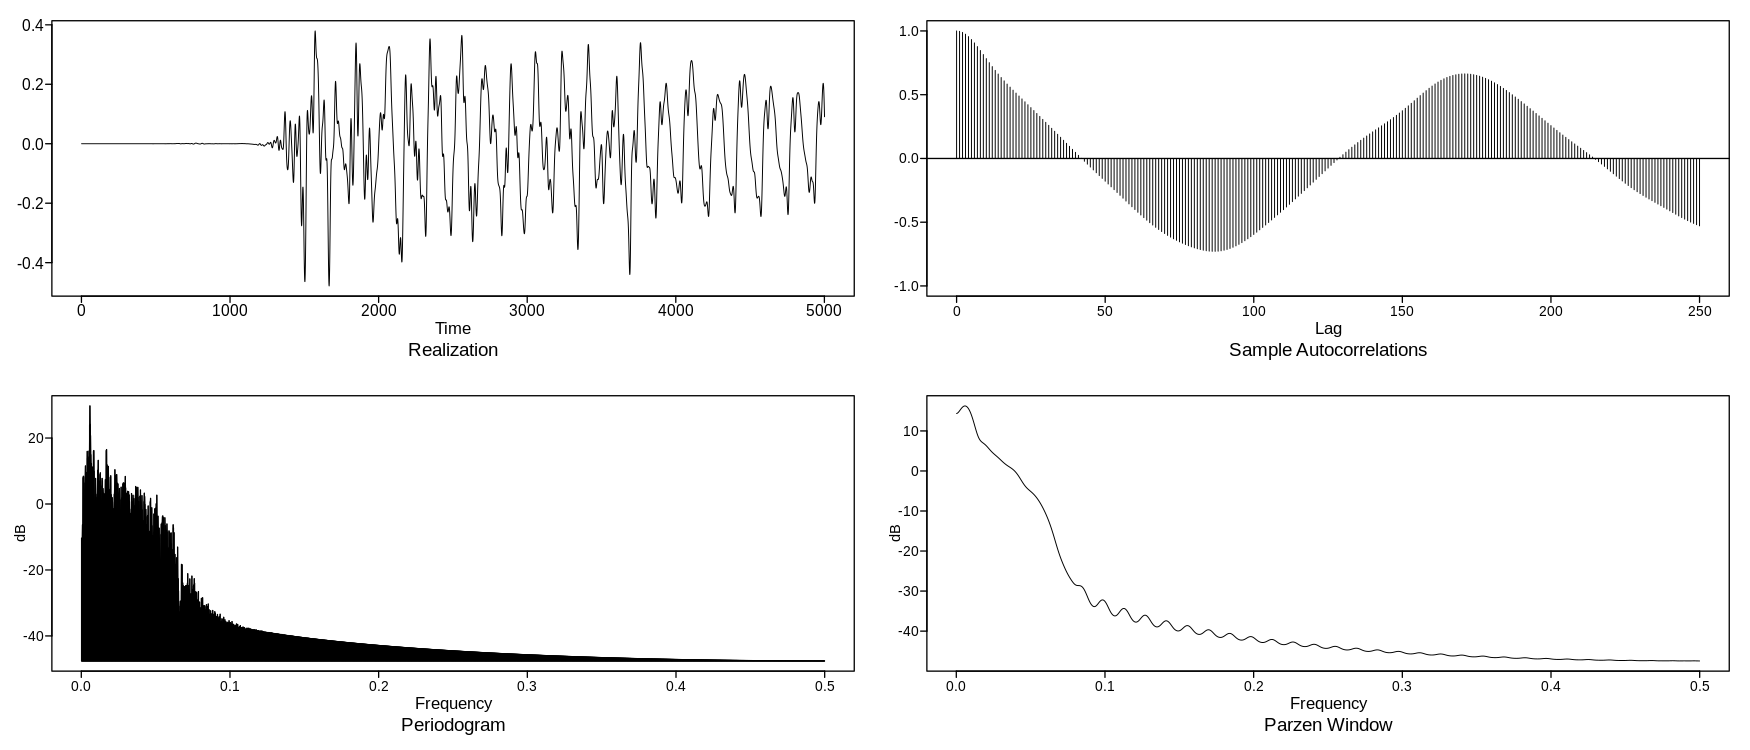

In [34]:
low.plots <- plotts.sample.wge(data.low$x.filt, lag.max = 250)

Band-Pass Filter

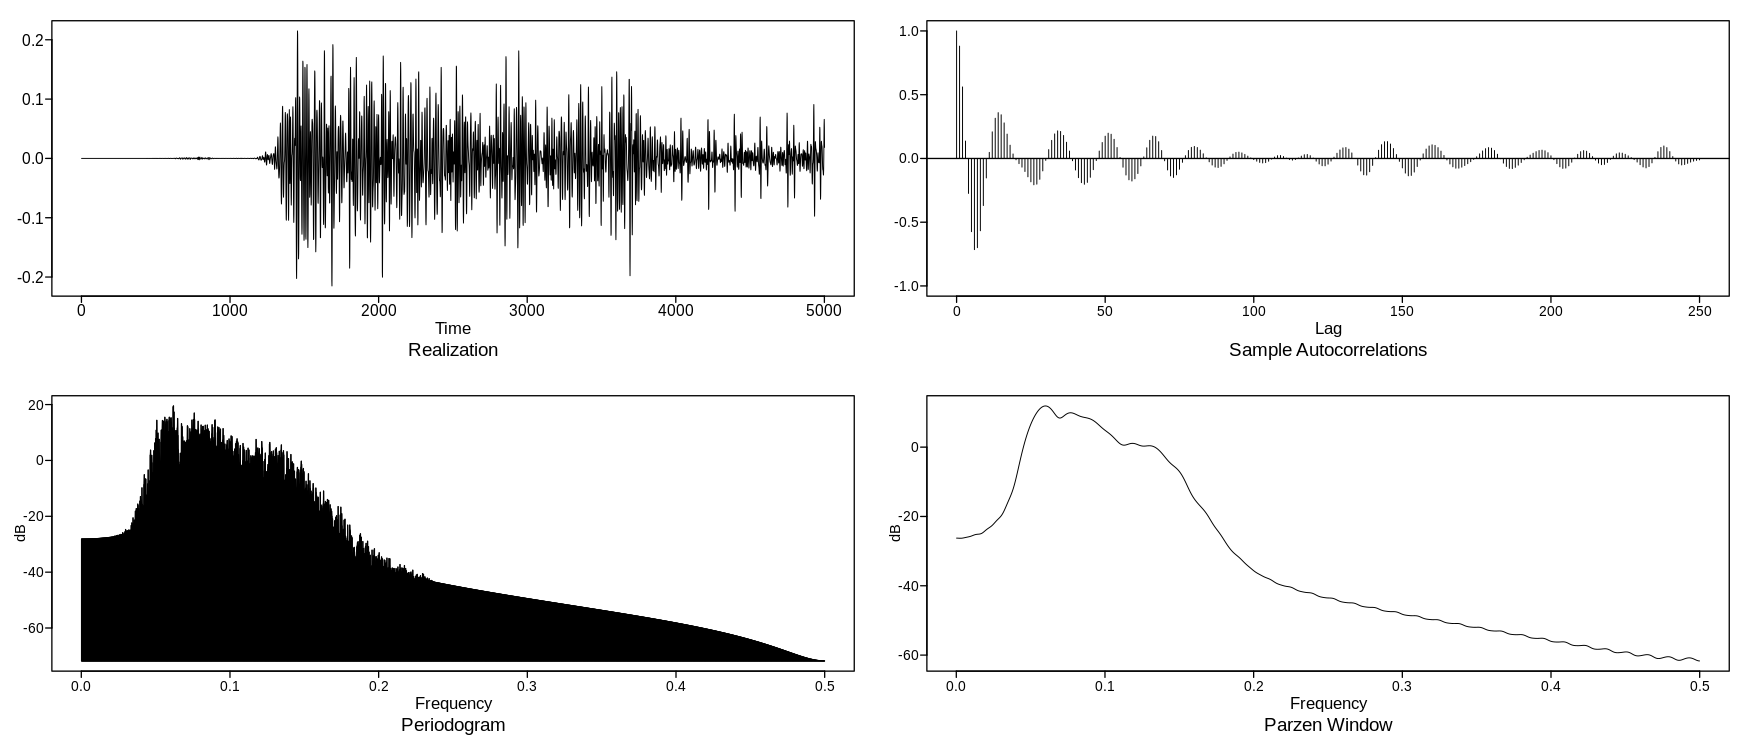

In [35]:
band.plots <- plotts.sample.wge(data.band$x.filt, lag.max = 250)

##5) Conclusion

Looking at the raw data, there seems to be observable peaks and troughs of the realization with a moderate frequency.  However, when the data is put through the high-pass filter, the frequency seems much more rampant.  As expected, the low-pass filter caused the realization to be much smoother and easier to disseminate.  Finally, the band-pass filter appears to be somewhere in the middle.  Taking a look at the frequency, unsurprisingly there is a high frequency at the beginning of the low-pass filter when there is no music playing, and when it starts to build up.  The high-pass filter appears to have a low-frequency at the start, and then it skyrockets and mellows back down.  Overall, the filters are extremely useful in being able to observe a certain window of information rather than observing the entire dataset itself.  They allow scientists and researchers to save time, and obtain the best results.

##6) References



1.   Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

2.   Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

3.   Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 3 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1qIdpd_8WFct9zBZ5uwO_Bcg-F3svu0KJ?usp=sharing.

4.   Davis, T. (2021). Applied Time Series Analysis: Code Snippets - Analyzing Audio Files [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1IuULZkusjNlO-LMrPhNfiq3UGKWauDCi?usp=sharing. item item

5. Black, Rebecca. "Friday". 2011. Soundboard, https://www.soundboard.com/sb/sound/359637

